# Projeto Final

In [24]:
#Importação das bibliotecas

import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [32]:
#conexão
conn = psycopg2.connect(
    host="localhost",
    database="credito",
    user="postgres",
    password="1234",
    port=5432,
)

In [33]:
#cria um cursor
cursor = conn.cursor()
#define consulta
query = 'SELECT * FROM CREDITO_OFICIAL;'
#executa
df_credito = pd.read_sql(query, conn)
df_credito.head(10)

,IDCREDITO,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,Fiador,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,PROFISSAO,Dependentes,SocioEmpresa,Estrangeiro,Inadimplente
0,2,48,existentes/pagos,reforma,5951,<100\\n,1<=X<4,2,Solteiro,nao,2.0,22,nenhum,proria,1,qualificado,1,nao,nao,nao
1,3,12,Critico-outros creditos,educacao,2096,<100\\n,4<=X<7,2,Viuvo,nao,3.0,49,nenhum,proria,1,nao qualificado,2,nao,nao,sim
2,4,42,existentes/pagos,moveis,7882,<100\\n,4<=X<7,2,Viuvo,sim,4.0,45,nenhum,de graca,1,qualificado,2,nao,nao,sim
3,5,24,Atrasos anteriores,veiculo novo,4870,<100\\n,1<=X<4,3,Viuvo,nao,4.0,53,nenhum,de graca,2,qualificado,2,nao,nao,nao
4,6,36,existentes/pagos,educacao,9055,Desconhecido\\n,1<=X<4,2,Viuvo,nao,4.0,35,nenhum,de graca,1,nao qualificado,2,sim,nao,sim
5,7,24,existentes/pagos,moveis,2835,500<=X<1000,>=7,3,Viuvo,nao,4.0,53,nenhum,proria,1,qualificado,1,nao,nao,sim
6,9,12,existentes/pagos,reforma,3059,>=1000,4<=X<7,2,Casado,nao,4.0,61,nenhum,proria,1,nao qualificado,1,nao,nao,sim
7,11,12,existentes/pagos,veiculo novo,1295,<100\\n,<1,3,Solteiro,nao,1.0,25,nenhum,alugada,1,qualificado,1,nao,nao,nao
8,13,12,existentes/pagos,reforma,1567,<100\\n,1<=X<4,1,Solteiro,nao,1.0,22,nenhum,proria,1,qualificado,1,sim,nao,sim
9,14,24,Critico-outros creditos,veiculo novo,1199,<100\\n,>=7,4,Viuvo,nao,4.0,60,nenhum,proria,2,nao qualificado,1,nao,nao,nao


In [35]:
# Função para exibição de Dados Categoricos

def my_barplot(column_name, column_groupby, graphic_title):
  # Estilo
  sns.set_theme(style="whitegrid")

  # Criando o barplot
  plt.figure(figsize=(10, 6))  # Tamanho da figura
  barplot = sns.barplot(
      x=column_groupby.index, 
      y=column_groupby.values, 
      palette="viridis"  # Paleta de cores
  )

  # Adicionando rótulos aos eixos e título
  plt.title(f'{graphic_title}', fontsize=16, fontweight='bold')
  plt.xlabel(f'{column_name}', fontsize=14)
  plt.ylabel("Frequência", fontsize=14)

  # Rotacionando os rótulos do eixo x (se necessário)
  plt.xticks(rotation=45, fontsize=12)
  plt.yticks(fontsize=12)

  # Adicionando valores no topo de cada barra
  for p in barplot.patches:
      barplot.annotate(
          format(p.get_height(), ".0f"),  # Formato do número
          (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição
          ha="center", va="center", fontsize=12, color="black", xytext=(0, 5),
          textcoords="offset points"
      )

  # Ajustando layout
  plt.tight_layout()

  # Exibindo o gráfico
  plt.show()

Análise Exploratoria

In [36]:
groupby_HistoricoCredito = df_credito.groupby(df_credito['HistoricoCredito']).size()
groupby_HistoricoCredito

HistoricoCredito
Atrasos anteriores           86
Critico-outros creditos     289
existentes/pagos            526
sem creditos/todos pagos     40
todos pagos                  48
dtype: int64

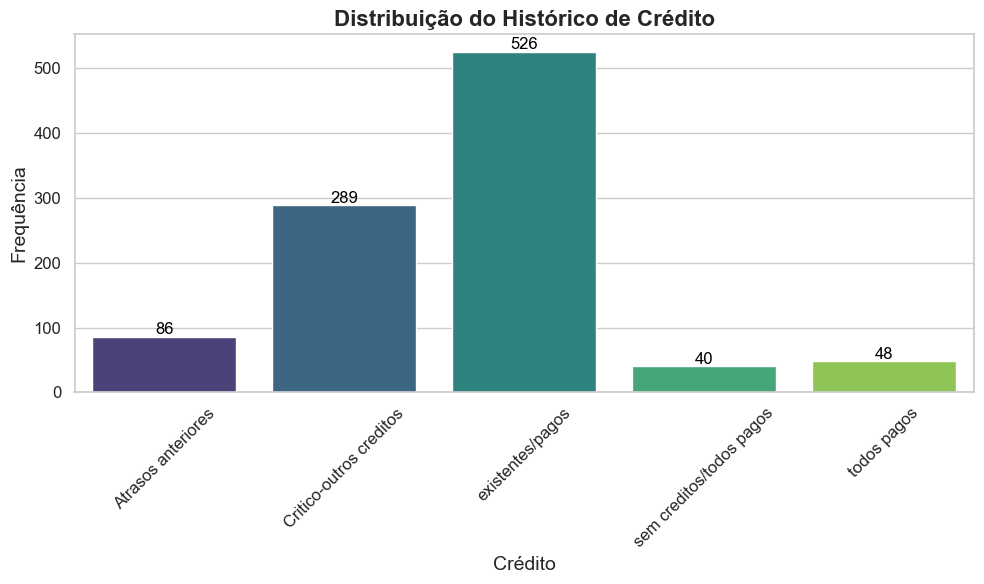

In [37]:
my_barplot(
    column_name='Crédito', 
    column_groupby=groupby_HistoricoCredito, 
    graphic_title='Distribuição do Histórico de Crédito'
    )

In [38]:
# Verificando valores faltantes
df_credito['HistoricoCredito'].isnull().sum()

np.int64(11)

Coluna "Proposito"

In [39]:
groupby_Proposito = df_credito.groupby([df_credito['Proposito']]).size()
groupby_Proposito

Proposito
abrir negocio     97
educacao          50
moveis           181
outros            12
qualificacao       9
quitar divida     12
reforma          280
reforma casa      22
veiculo novo     234
veiculo usado    103
dtype: int64

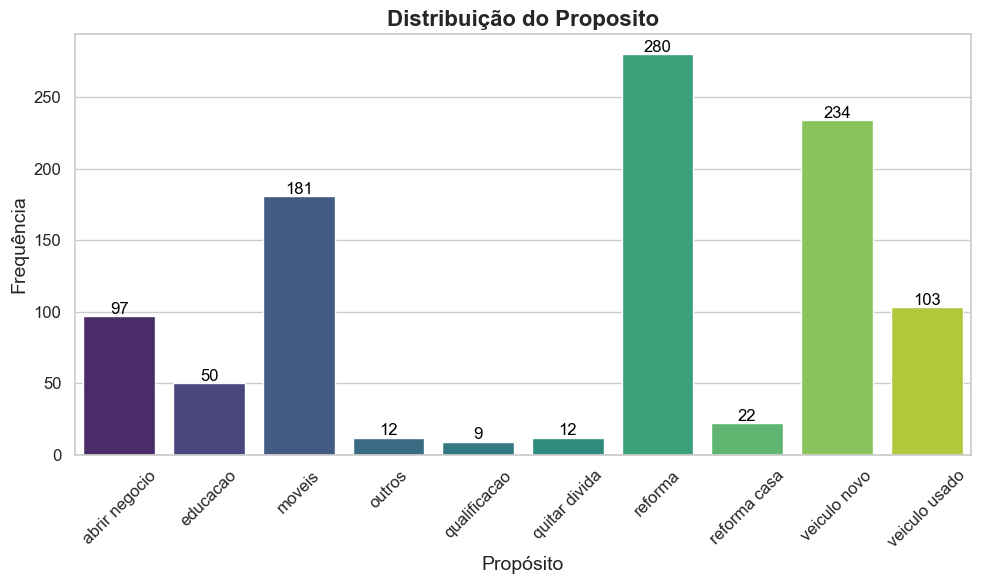

In [40]:
my_barplot(
    column_name='Propósito', 
    column_groupby=groupby_Proposito, 
    graphic_title='Distribuição do Proposito'
    )

In [41]:
# Valores Faltantes
df_credito['Proposito'].isnull().sum()

np.int64(0)

Coluna "Investimentos"

In [42]:
groupby_Investimentos = df_credito.groupby(['Investimentos']).size()
groupby_Investimentos

Investimentos
100<=X<500         103
500<=X<1000         63
<100\\n            603
>=1000              48
Desconhecido\\n    183
dtype: int64

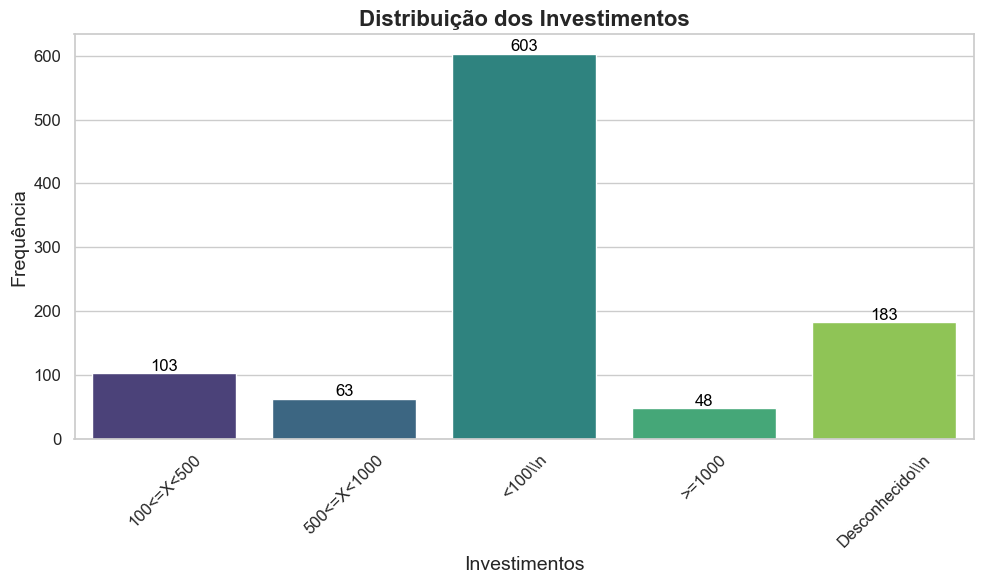

In [43]:
my_barplot(
    column_name='Investimentos', 
    column_groupby=groupby_Investimentos, 
    graphic_title='Distribuição dos Investimentos'
    )

In [44]:
# Valores Faltantes
df_credito['Investimentos'].isnull().sum()

np.int64(0)

Coluna "Investimentos"